<a href="https://colab.research.google.com/github/wpwwahyu/TKC_FinalProject/blob/main/CBIR_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Machine Learning"

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine Learning
!ls -a

/content/drive/MyDrive/Colab Notebooks/Machine Learning
.ipynb_checkpoints  kaggle.json  xray_dataset  xray_dataset.zip


In [4]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/xray_dataset.zip"

In [5]:
import os
base_dataset = "xray_dataset"
class_dir = ['NORMAL','PNEUMONIA']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpeg"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
!pip install split_folders
import splitfolders

In [6]:
#untuk menetapkan directory

input_folder = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/xray_dataset"
base_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/xray_dataset/model_modul3"

In [ ]:
splitfolders.ratio(input_folder, output = base_dir, seed=1337, ratio=(0.80,0.19,0.01))

Copying files: 5856 files [31:58,  3.05 files/s]


In [7]:
import os
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [8]:
print('Train NORMAL :', os.listdir(train_normal_dir)[:10])
print('Train PNEUMONIA :', os.listdir(train_pneumonia_dir)[:10])
print("\n")

print('Validation NORMAL :', os.listdir(validation_normal_dir)[:10])
print('Validation PNEUMONIA :', os.listdir(validation_pneumonia_dir)[:10])
print("\n")

print('Test NORMAL :', os.listdir(test_normal_dir)[:10])
print('Test PNEUMONIA :', os.listdir(test_pneumonia_dir)[:10])

Train NORMAL : ['IM-0241-0001.jpeg', 'IM-0279-0001.jpeg', 'IM-0250-0001.jpeg', 'IM-0266-0001.jpeg', 'IM-0301-0001.jpeg', 'IM-0315-0001.jpeg', 'IM-0309-0001.jpeg', 'IM-0292-0001.jpeg', 'IM-0300-0001.jpeg', 'IM-0299-0001.jpeg']
Train PNEUMONIA : ['person505_virus_1017.jpeg', 'person517_virus_1035.jpeg', 'person468_bacteria_1991.jpeg', 'person494_virus_1000.jpeg', 'person45_bacteria_222.jpeg', 'person491_bacteria_2081.jpeg', 'person513_virus_1030.jpeg', 'person500_virus_1009.jpeg', 'person481_bacteria_2042.jpeg', 'person511_virus_1027.jpeg']


Validation NORMAL : ['IM-0009-0001.jpeg', 'IM-0019-0001.jpeg', 'IM-0001-0001.jpeg', 'IM-0041-0001.jpeg', 'NORMAL2-IM-0060-0001.jpeg', 'IM-0091-0001.jpeg', 'IM-0084-0001.jpeg', 'IM-0050-0001.jpeg', 'IM-0049-0001.jpeg', 'IM-0033-0001.jpeg']
Validation PNEUMONIA : ['person111_bacteria_536.jpeg', 'person139_bacteria_661.jpeg', 'person124_bacteria_589.jpeg', 'person139_bacteria_664.jpeg', 'person108_bacteria_507.jpeg', 'person11_virus_38.jpeg', 'person10

In [9]:
print('Train NORMAL :', len(os.listdir(train_normal_dir)))
print('Train PNEUMONIA :', len(os.listdir(train_pneumonia_dir)))
print("\n")

print('Validation NORMAL :', len(os.listdir(validation_normal_dir)))
print('Validation PNEUMONIA :', len(os.listdir(validation_pneumonia_dir)))
print("\n")

print('Test NORMAL :', len(os.listdir(test_normal_dir)))
print('Test PNEUMONIA :', len(os.listdir(test_pneumonia_dir)))

Train NORMAL : 1266
Train PNEUMONIA : 3418


Validation NORMAL : 300
Validation PNEUMONIA : 811


Test NORMAL : 17
Test PNEUMONIA : 44


In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [11]:
height = 200
width = 200
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='binary',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 4684 images belonging to 2 classes.
Found 1111 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[200,200,3]))
model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 200, 200, 8)       224       
_________________________________________________________________
batch_normalization_27 (Batc (None, 200, 200, 8)       32        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 100, 100, 8)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 100, 100, 16)      1168      
_________________________________________________________________
batch_normalization_28 (Batc (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 50, 50, 32)       

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
history1 = model.fit(train_generator, epochs=10, validation_data = validation_generator)

Epoch 1/10
147/147 [==============================] - 2920s 20s/step - loss: 0.5127 - acc: 0.8841 - val_loss: 12.2468 - val_acc: 0.7300
Epoch 2/10
147/147 [==============================] - 111s 755ms/step - loss: 0.1913 - acc: 0.9270 - val_loss: 4.6734 - val_acc: 0.7300
Epoch 3/10
147/147 [==============================] - 111s 753ms/step - loss: 0.1716 - acc: 0.9347 - val_loss: 0.6320 - val_acc: 0.8029
Epoch 4/10
147/147 [==============================] - 110s 748ms/step - loss: 0.1529 - acc: 0.9432 - val_loss: 0.3486 - val_acc: 0.8839
Epoch 5/10
147/147 [==============================] - 110s 748ms/step - loss: 0.1484 - acc: 0.9387 - val_loss: 0.2563 - val_acc: 0.8920
Epoch 6/10
147/147 [==============================] - 112s 762ms/step - loss: 0.1340 - acc: 0.9515 - val_loss: 0.8056 - val_acc: 0.6733
Epoch 7/10
147/147 [==============================] - 112s 762ms/step - loss: 0.1336 - acc: 0.9532 - val_loss: 0.1888 - val_acc: 0.9217
Epoch 8/10
147/147 [============================

##Model 2

In [24]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()
model.add(InputLayer(input_shape=(200,200,3,)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))
model.add(Dense(1, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 average_pooling2d_12 (Avera  (None, 100, 100, 64)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 dropout_15 (Dropout)        (None, 100, 100, 128)     0         
                                                                 
 average_pooling2d_13 (Avera  (None, 50, 50, 128)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 256)      

In [25]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [26]:
history2 = model.fit(train_generator, epochs=10, validation_data = validation_generator)

Epoch 1/10
147/147 [==============================] - 122s 817ms/step - loss: 0.6264 - acc: 0.7297 - val_loss: 0.5250 - val_acc: 0.7300
Epoch 2/10
147/147 [==============================] - 120s 814ms/step - loss: 0.4666 - acc: 0.7297 - val_loss: 2.2280 - val_acc: 0.7300
Epoch 3/10
147/147 [==============================] - 119s 809ms/step - loss: 0.4107 - acc: 0.7297 - val_loss: 5.1327 - val_acc: 0.7300
Epoch 4/10
147/147 [==============================] - 119s 810ms/step - loss: 0.3467 - acc: 0.7297 - val_loss: 0.2911 - val_acc: 0.7300
Epoch 5/10
147/147 [==============================] - 120s 814ms/step - loss: 0.3456 - acc: 0.7297 - val_loss: 1.9639 - val_acc: 0.7300
Epoch 6/10
147/147 [==============================] - 120s 814ms/step - loss: 0.3033 - acc: 0.7297 - val_loss: 5.5415 - val_acc: 0.7300
Epoch 7/10
147/147 [==============================] - 119s 811ms/step - loss: 0.3043 - acc: 0.7297 - val_loss: 0.9804 - val_acc: 0.7300
Epoch 8/10
147/147 [============================

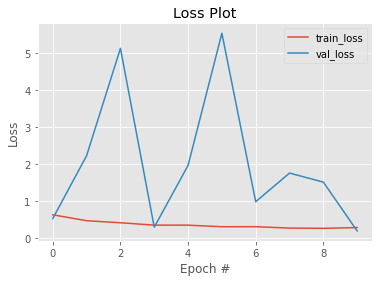

In [27]:
# Tulis Program Anda Disini!
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
#plt.axis(0,15,0,8)
plt.plot(np.arange(0, 10), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

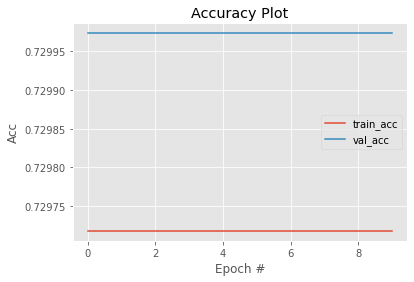

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), history2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [32]:
# Tulis Program Anda Disini!
train_scores = model.evaluate(train_generator)
validation_scores = model.evaluate(validation_generator)
test_scores = model.evaluate(test_generator)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(validation_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

2/2 [==============================] - 1s 269ms/step - loss: 0.3047 - acc: 0.7213
Training Accuracy: 72.97%
Validation Accuracy: 73.00%
Testing Accuracy: 72.13%


In [36]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model.predict(test_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.28      1.00      0.44        17
   PNEUMONIA       0.00      0.00      0.00        44

    accuracy                           0.28        61
   macro avg       0.14      0.50      0.22        61
weighted avg       0.08      0.28      0.12        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#Plot the confusion matrix. Set Normalize = True/False
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


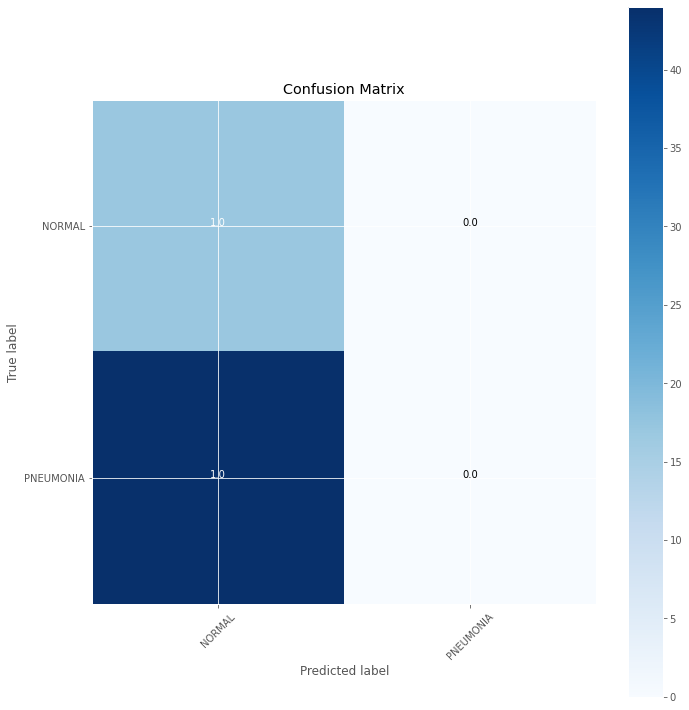

In [38]:
pred = model.predict(test_generator)
labels = np.argmax(pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, labels)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')